## Analyzing the Stroop Effect

The indepdent variable is the condition presented to the participant between experiments. For instance, the congruent words condition presents words of colors with their respective font color, while incongruent words condition presents words of colors with different font colors. The depedent variable is simply the time taken by the participant to name the ink-colors in the equally-sized lists for each condition.

Null hypothesis: The expected values between the time taken to say the congruent and incongruent words conditions are not statistically significantly different from each other, or mathematically stated,

$H_o$: $\mu_\text{congruent} = \mu_{incongruent}$.

Alternative hypothesis: The expected values between the time taken to say the congruent and incongruent words conditions are statistically significantly different from each other, or mathematically stated,

$H_1$: $\mu_\text{congruent} \neq \mu_{incongruent}$.


For this task we expect to perform a t-test for dependent variables and a p-test. This is because the same participants are present in both conditions. There are 24 participants. This number is too small to do a z-test. We are not trying to fit the data to any model, so we do not perform a f-test. We perform a depdent t-test because we want to know if there is a statistically significantly difference between the means of both conditions. The t-statistic illustrates the number of standard deviation that $\mu_\text{congruent}$ is away from $\mu_\text{incongruent}$. The bigger the t-statistic, the more confident we are to reject the null hypothesis. Similarly, p-test will allow us to reject or fail to reject the null hypothesis. We use a 5% cutoff for the p-test.

### Code

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

con,incon = np.loadtxt('stroopdata.csv',delimiter=',',
                       skiprows=1,usecols=(0, 1),unpack=True)
par = np.arange(1,len(con)+1) # participants starting from 1

# here for central tendency I compute mean and median 
# (not mode because these are not integer values)
mu_con, mu_incon = np.mean(con), np.mean(incon) # mean
me_con, me_incon = np.median(con), np.median(incon) # median

print(mu_con, mu_incon)

# for measure of variability I compute range, interquartile range,
# variance and standard deviation
r_con, r_incon = np.ptp(con), np.ptp(incon) # range
iqr_con = np.subtract(*np.percentile(con, [75, 25]))
iqr_icon = np.subtract(*np.percentile(incon, [75, 25])) # interquartile range

def sample_var(elements,mean):
    """Returns the variance of a sample"""
    return 1./(len(elements) - 1.) * np.sum((elements - mean)**2.)

var_con, var_incon = sample_var(con,mu_con), sample_var(incon,mu_incon) # variance
std_con, std_incon = np.sqrt(var_con), np.sqrt(var_incon) # standard deviation

print(std_con,std_incon)

14.051125 22.0159166667
3.55935795765 4.79705712247


The expected time to say the congruent words condition is 14.05 seconds while for the incongruent words condition it is 22.02 seconds. The distribution of the time taken to say the incongruent words condition is more spread out than for the congruent words condition with 4.80 seconds as the standard deviation compared to 3.56 seconds from the congruent words condition.

### Visualizations

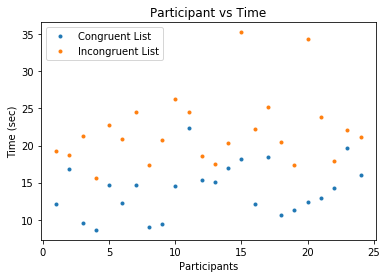

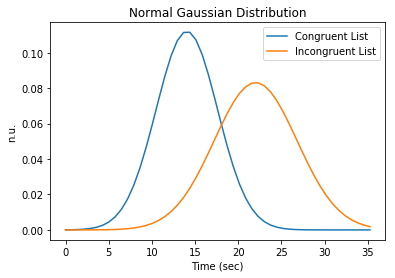

In [3]:
plt.figure(1)
plt.plot(par,con,'.',label='Congruent List')
plt.plot(par,incon,'.',label='Incongruent List')
plt.title('Participant vs Time')
plt.ylabel('Time (sec)')
plt.xlabel('Participants')
plt.legend()
plt.show()

def norm_gauss(x,mu,std):
    return 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (l - mu)**2 / (2 * std**2) )
l = np.linspace(0,np.max(incon))
plt.figure(2)
plt.plot(l, norm_gauss(l,mu_con,std_con),label='Congruent List')
plt.plot(l,norm_gauss(l,mu_incon,std_incon),label='Incongruent List')
plt.title('Normal Gaussian Distribution')
plt.xlabel('Time (sec)')
plt.ylabel('n.u.')
plt.legend()
plt.show()


As we can see from the fist figure all participants took longer to finish the incongruent words condition. This leads to a higher mean value, but does not necessarily lead to a same distribution. Using a normalized gaussian distribution for both sets of data, we can see in the second figure that the incongruent words condition is more spread and with a higher mean value. This means that it does not only take more time for participants to finish the incongruent words condition but that it is more probable to obtain values more spread out from the mean value than for the congruent words condition. 

### Statistical Test

In [4]:
# Perform the statistical test here
print(stats.ttest_rel(con,incon))


Ttest_relResult(statistic=-8.0207069441099588, pvalue=4.1030005857111556e-08)


The dependent two-tailed t-test gives a result of: $t(23) = -8.0207$ and a p-value of 4.1030 $\times$ 10$^{-8}$. Since the p-value is significantly below the 0.05 cutoff (confidence level of 95%), as well as having a t-statistic of -8.0207 which means that $\mu_\text{congruent}$ is more than 8 standard deviation away from $\mu_\text{incongruent}$, we come to the conclusion that the two sets of data are statistically significantly different and therefore we reject the null hypothesis that the expected values between the time taken to say the congruent and incongruent words conditions are not statistically significantly different from each other. These results match up my expectations because from the graphs above and the measurements of central tendency and variability we observed that the time taken for the incongruent words condition was longer and had a bigger spread.